In [260]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [261]:
campaign = "wmt21.tedtalks"
lp = "en-de"

In [262]:
filepath = '/Users/geovern/Documents/scores/'

In [263]:
# with open(filepath + '{}_{}_seg-mbart50prism_scores.json'.format(campaign, lp), "r") as f:
#     scores = json.load(f)
# with open(filepath + '{}_{}_seg-ctxmbart50prism_scores.json'.format(campaign, lp), "r") as f:
#     scores_ctx = json.load(f)
# with open(filepath + '{}_{}_seg-ctxrefmbart50prism_scores.json'.format(campaign, lp), "r") as f:
#     scores_ctxref = json.load(f)

In [264]:
with open(filepath + '{}_{}_seg-mycomet_scores.json'.format(campaign, lp), "r") as f:
    scores = json.load(f)
with open(filepath + '{}_{}_seg-ctxpartmycomet-qe_scores.json'.format(campaign, lp), "r") as f:
    scores_ctx = json.load(f)
with open(filepath + '{}_{}_seg-ctxpartsrcmycomet-qe_scores.json'.format(campaign, lp), "r") as f:
    scores_ctxref = json.load(f)

In [265]:
with open('/Users/geovern/Documents/mqm_scores/{}_{}_mqm_scores.json'.format(campaign, lp), "r") as f:
    scores_mqm = json.load(f)

In [266]:
start = 140 + 77
doc_len = 31

In [267]:
avg_mqm_scores = np.mean(np.array([scores_mqm[system][start:start+doc_len] for system in scores_mqm if "ref" not in system]), axis = 0)
avg_scores = np.mean(np.array([scores["sys"][system][0][start:start+doc_len] for system in scores["sys"] if "ref" not in system]), axis = 0)
avg_scores_ctx = np.mean(np.array([scores_ctx["sys"][system][0][start:start+doc_len] for system in scores_ctx["sys"] if "ref" not in system]), axis = 0)
avg_scores_ctxref = np.mean(np.array([scores_ctxref["sys"][system][0][start:start+doc_len] for system in scores_ctxref["sys"] if "ref" not in system]), axis = 0)


In [268]:
avg_mqm_scores = avg_mqm_scores - np.mean(avg_mqm_scores)
avg_scores = avg_scores - np.mean(avg_scores)
avg_scores_ctx = avg_scores_ctx - np.mean(avg_scores_ctx)
avg_scores_ctxref = avg_scores_ctxref - np.mean(avg_scores_ctxref)


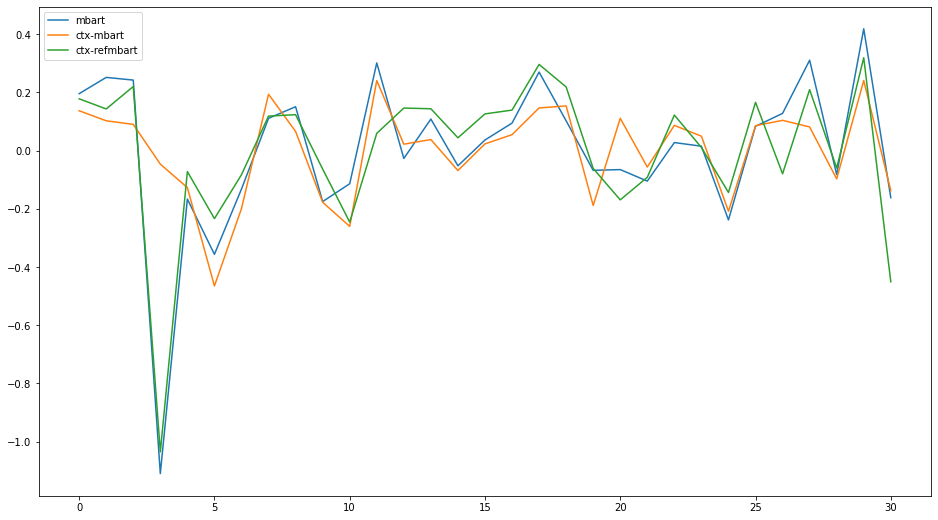

In [269]:
plt.figure(figsize=[16,9])
plt.plot(avg_scores, label="mbart")
plt.plot(avg_scores_ctx, label="ctx-mbart")
plt.plot(avg_scores_ctxref, label="ctx-refmbart")
# plt.plot(avg_mqm_scores, label="mqm")
plt.legend()

In [270]:
with open('/Users/geovern/Documents/outs/{}/{}/refA'.format(campaign, lp), "r") as f:
    outfile = f.readlines()
with open('/Users/geovern/Documents/ins/{}/{}/src'.format(campaign, lp), "r") as f:
    infile = f.readlines()

In [273]:
best = np.argsort(abs(avg_scores_ctxref - avg_mqm_scores))[:10]
for i in best:
    print(infile[start+i], outfile[start+i])
    print(avg_scores[i], avg_scores_ctxref[i], avg_mqm_scores[i])
    print()
avg_len = np.mean([len(outfile[start+i].split(" ")) for i in best])
print("Average sentence length {}".format(avg_len))

As an artist, connection is very important to me.
 Als Künstler ist mir der Zusammenhang sehr wichtig.

0.1959044128956814 0.17818597620713617 0.23970223325062046

(Music) And just like that, the iceberg shows you a different side of its personality.
 (Musik) Und einfach so, zeigt Ihnen der Eisberg eine andere Seite seiner Persönlichkeit.

-0.08250746545171544 -0.05987198883307074 -0.14491315136476413

I approach photographing these icebergs as if I'm making portraits of my ancestors, knowing that in these individual moments they exist in that way and will never exist that way again.
 Ich gehe bei meinen Aufnahmen dieser Eisberge so vor, als würde ich Portraits meiner Vorfahren machen, in dem Bewusstsein, dass sie in diesen individuellen Augenblicken aus diese Weise existieren, und niemals wieder so existieren werden.

-0.05203768548345372 0.04418063825356866 0.16277915632754358

It is not a death when they melt; it is not an end, but a continuation of their path through the cycle of l

In [212]:
worst = np.argsort(abs(avg_scores_ctxref - avg_mqm_scores))[::-1][:10]
for i in worst:
    print(infile[start+i], outfile[start+i])
    print(avg_scores[i], avg_scores_ctxref[i], avg_mqm_scores[i])
    print()
avg_len = np.mean([len(outfile[start+i].split(" ")) for i in worst])
print("Average sentence length {}".format(avg_len))

You can see here, it begins to roll, and the boat has moved to the other side, and the man is standing there.
 Sie können hier sehen, er beginnt zu rollen, und das Boot hat sich zur anderen Seite bewegt, der Mann steht dort.

-0.23799628098285003 -0.14372905904066657 -3.8449131513647643

The icebergs around me were almost 200 feet out of the water, and I could only help but wonder that this was one snowflake on top of another snowflake, year after year.
 Die Eisberge um mich herum ragten beinah 60 Meter aus dem Wasser. Und ich konnte nur staunen, dass das eine Schneeflocke auf einer anderen Schneeflocke war, Jahr um Jahr.

-0.35630583920305775 -0.23355786317598914 -3.0910669975186105

Some refuse to give up and hold on to the bitter end, while others can't take it anymore and crumble in a fit of dramatic passion.
 Manche weigern sich aufzugeben und klammern bis zum bitteren Ende, während andere es nicht mehr aushalten und in einem Anfall dramatischer Leidenschaft zusammenstürzen.

-0.1

In [213]:
best = np.argsort(abs(avg_scores_ctxref - avg_mqm_scores) - abs(avg_scores - avg_mqm_scores))[:10]
for i in best:
    print(infile[start+i], outfile[start+i])
    print(avg_scores[i], avg_scores_ctxref[i], avg_mqm_scores[i])
    print()
avg_len = np.mean([len(outfile[start+i].split(" ")) for i in best])
print("Average sentence length {}".format(avg_len))

As an iceberg melts, I am breathing in its ancient atmosphere.
 Während ein Eisberg schmilzt, atme ich seine vorzeitliche Atmosphäre ein.

-0.026831188767908076 0.1463719636796703 0.701240694789082

The last pictures I'd like to show you are of an iceberg that I photographed in Qeqetarsuaq, Greenland.
 Die letzten Bilder die ich Ihnen gern zeigen möchte, zeigen einen Eisberg, den ich in Kekertsuatsiak in Grönland photographiert habe.

0.10259844604158597 0.2190223891137829 1.1627791563275436

So here it is.
 So here it is.

-0.06509672936773109 -0.16906965488207434 -0.9141439205955335

And this video is real time.
 Und dieses Video ist in Echtzeit.

0.31088090005541047 0.2096835250257244 -0.06799007444168725

I approach photographing these icebergs as if I'm making portraits of my ancestors, knowing that in these individual moments they exist in that way and will never exist that way again.
 Ich gehe bei meinen Aufnahmen dieser Eisberge so vor, als würde ich Portraits meiner Vorfahren 

In [214]:
worst = np.argsort(abs(avg_scores_ctxref - avg_mqm_scores) - abs(avg_scores - avg_mqm_scores))[::-1][:10]
for i in worst:
    print(infile[start+i], outfile[start+i])
    print(avg_scores[i], avg_scores_ctxref[i], avg_mqm_scores[i])
    print()
avg_len = np.mean([len(outfile[start+i].split(" ")) for i in worst])
print("Average sentence length {}".format(avg_len))

(Applause)
 (Applaus)

-0.1615747755465488 -0.4506933032871494 1.1627791563275436

But the reality is far from it.
 Aber die Wahrheit ist weit davon entfernt.

0.30158604684496115 0.05938188737618827 0.31662531017369744

It's about 120 feet above the water, or 40 meters.
 Er ragt etwa 120 Fuß aus dem Wasser, oder 40 Meter.

0.12808840695047574 -0.07955604942154978 0.15508684863523592

It's easy to think, when you look at an iceberg, that they're isolated, that they're separate and alone, much like we as humans sometimes view ourselves.
 Wenn man einen Eisberg betrachtet, denkt man leicht dass sie isoliert sind, getrennt und allein, ganz so wie wir Menschen uns oft sehen.

-0.11368143972730443 -0.24552396140632127 0.5473945409429282

The icebergs around me were almost 200 feet out of the water, and I could only help but wonder that this was one snowflake on top of another snowflake, year after year.
 Die Eisberge um mich herum ragten beinah 60 Meter aus dem Wasser. Und ich konnte nur st

In [106]:
with open('/Users/geovern/Documents/outs/{}/{}/refB'.format(campaign, lp), "r") as f:
    outfile = f.readlines()

In [107]:
print(outfile[49])
print(outfile[81])
print(outfile[50])
print(outfile[82])
print(outfile[48])

Maybe sometimes.

Thank you.

Are they beneficial?

(Applause)

Are they evil?



In [108]:
print(outfile[55])

We set into motion that domino effect that carves out AI's evolutionary path.

